In [1]:
import numpy as np
from jax import numpy as jnp
from quadax import cumulative_simpson
from jax.scipy.stats.norm import logcdf as norm_logcdf
from jax.scipy.special import gamma

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def r2mu(r):
    """Convert distance in Mpc to distance modulus."""
    return 5 * jnp.log10(r) + 25

def mu2r(mu):
    """Convert distance modulus to distance in Mpc."""
    return 10 ** ((mu - 25) / 5)


def simpson2d(f_val, x_grid, y_grid):
    """Evaluate a 2D integral using Simpson's rule."""
    inner = cumulative_simpson(f_val, x=y_grid, axis=1, initial=0.0)
    outer = cumulative_simpson(inner, x=x_grid, axis=0, initial=0.0)
    return outer[-1, -1]


def log_pdf_LF(M, M_star, width):
    """Simple Gaussian-like luminosity function. Replace with Schechter or other."""
    return -0.5 * ((M - M_star) / width) ** 2 - jnp.log(width * jnp.sqrt(2 * jnp.pi))


def log_integrand_p_det(M, r, M_star, width, mlim, sigma_m):
    """Logarithmic integrand for the detection probability."""
    return norm_logcdf((mlim - (r2mu(r) + M)) / sigma_m) + 2 * jnp.log(r) + log_pdf_LF(M, M_star, width)


In [14]:
M_star = -19.0
width = 0.5
M_min = -22
M_max = -16
M_grid = jnp.linspace(M_min, M_max, 2001)

r_min = 1e-5
r_max = 101

r_grid = jnp.linspace(r_min, r_max, 2501)

mlim = 14
sigma_m = 0.1

X, Y = jnp.meshgrid(M_grid, r_grid, indexing='ij')
log_integrand = log_integrand_p_det(X, Y, M_star, width, mlim, sigma_m)


# This is p(S = 1 | Lambda) from the Overleaf notation.
p_det = simpson2d(jnp.exp(log_integrand), M_grid, r_grid)

print(p_det)

26952.654


### Check the 2D grid

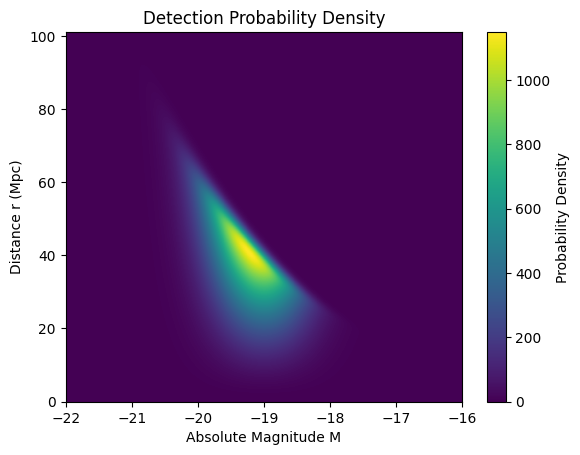

In [15]:
plt.figure()
plt.pcolormesh(M_grid, r_grid, jnp.exp(log_integrand.T), shading='auto')
plt.colorbar(label='Probability Density')
plt.xlabel('Absolute Magnitude M')
plt.ylabel('Distance r (Mpc)')
plt.title('Detection Probability Density')

plt.show()